<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/notebooks/06-Decision%20Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decisión Trees

<img align="left" width="350" src="../img/dt.png"/>

En esta notebook practicaremos el uso del clasificador de árbol de decisión en diferentes conjuntos de datos para observar sus alcances y características.

Usaremos la implementación de scikit-learn que puedes encontrar en: 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ejemplos ilustrativos 

## 1. Datos linealmente separables con una línea horizontal

En este primer ejemplo generamos un conjunto de datos linealmente separables con `make_blobs`. Estos datos pueden ser separados con una línea vértical, es decir con una condición de tipo

* Si $x>\alpha$ entonces $(x,y)\in\text{clase}_0$.
* Si $x<\alpha$ entonces $(x,y)\in\text{clase}_1$.

Primero, generamos y visualizamos los datos

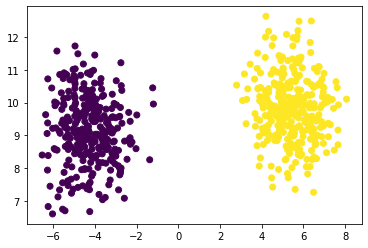

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=600,centers=2,random_state=31)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Dividimos los datos en *train/test*. Entrenamos el árbol de decisión usando la implementación de scikit-learn `sklearn.tree.DecisionTreeClassifier`. Realizamos la predicción sobre el conjunto de prueba.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Como es de esperar, obtenemos el 100% en todas las métricas

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure()
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Veamos el árbol de decisión

In [ ]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

Visualizamos la *frontera de decisión*.

In [ ]:
!pip install -qq dtreeviz

     |████████████████████████████████| 61 kB 204 kB/s 


In [ ]:
from dtreeviz.trees import ctreeviz_bivar

ct = ctreeviz_bivar(clf, X, y, feature_names = ['0','1'],fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

## 2. Datos linealmente separables con una línea con pendiente $m\neq 0$.

Transformamos los datos para ahora sean separables con línea no horizontal. Para esto, rotamos cada punto un ángulo $\theta=\frac{\pi}{4}=45°$; esto lo hacemos multiplicando por la matriz de rotación:

$$R=\left(\begin{array}{cc}\cos(\frac{\pi}{4}) & -\sin(\frac{\pi}{4}) \\
\sin(\frac{\pi}{4}) & \cos(\frac{\pi}{4})\end{array}\right)$$

<br>

$$X_r = (R\cdot X^T)^T$$

Después trasladamos la clase *amarilla* con el vector $z=(-1,-2)$.


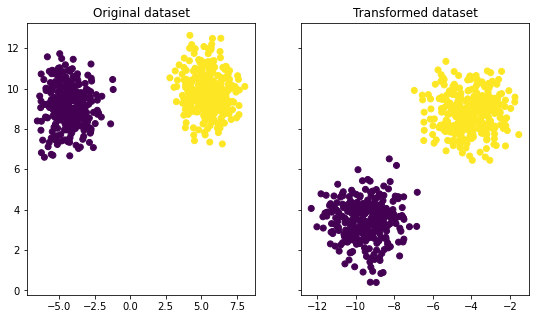

In [ ]:
import numpy as np

theta = np.pi/4 # Ángulo de rotación
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # Matriz de rotación

Xr = np.transpose(R@np.transpose(X)) # Rotamos el dataset

idxs = np.where(y==1)[0]

Xr[idxs,:] = Xr[idxs,:] + np.array([-1,-2])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(X[:,0],X[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xr[:,0],Xr[:,1],c=y)
axs[1].set_title("Transformed dataset")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Dados que los datos siguen siendo linealmente separables, seguimos obteniendo el 100% en todas las métricas.

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


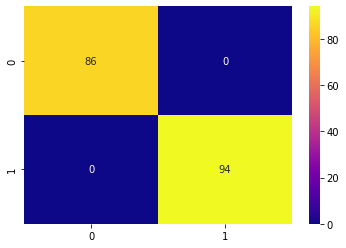

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure()
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Sin embargo, el árbol empieza a hacerse más complejo.

In [ ]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.32
|   |--- class: 0
|--- feature_1 >  6.32
|   |--- feature_0 <= -7.61
|   |   |--- class: 0
|   |--- feature_0 >  -7.61
|   |   |--- class: 1



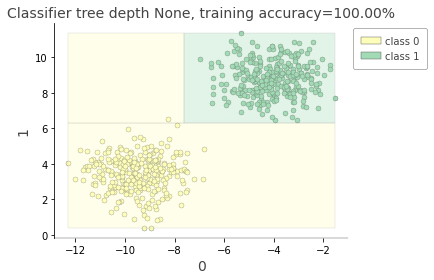

In [ ]:
from dtreeviz.trees import ctreeviz_bivar

ct = ctreeviz_bivar(clf, Xr, y, feature_names = ['0','1'],fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

## 3. Efecto de perturbaciones

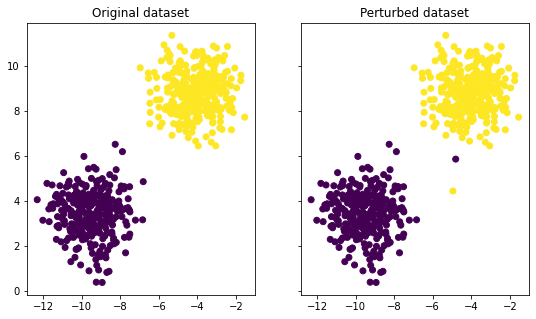

In [ ]:
Xrp = Xr.copy()
Xrp[192] = Xrp[192] + np.array([-1,-2])
Xrp[486] = Xrp[486] + np.array([2,1])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(Xr[:,0],Xr[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xrp[:,0],Xrp[:,1],c=y)
axs[1].set_title("Perturbed dataset")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xrp, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Accuracy: 0.994
Recall: 0.98936
Precision: 1.0


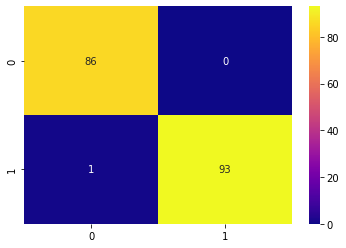

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure()
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

In [ ]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.59
|   |--- feature_0 <= -5.90
|   |   |--- class: 0
|   |--- feature_0 >  -5.90
|   |   |--- feature_0 <= -4.88
|   |   |   |--- class: 1
|   |   |--- feature_0 >  -4.88
|   |   |   |--- class: 0
|--- feature_1 >  6.59
|   |--- class: 1



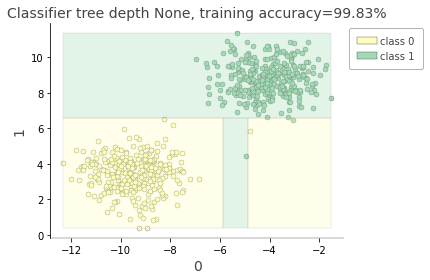

In [ ]:
from dtreeviz.trees import ctreeviz_bivar

ct = ctreeviz_bivar(clf, Xrp, y, feature_names = ['0','1'],fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

## 4. ¿Cómo es la frontera?

In [ ]:
import numpy as np
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=600,random_state=31, noise=0.1)

# --- MODIFICAMOS EL DATASET PARA QUE SEAN DOS CÍRCULOS SEPARADOS ---

idxs = np.where(y==0)[0]
X[idxs] *= 1.5

# --- GRAFICAMOS ---

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure()
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

In [ ]:
!pip install -qq dtreeviz

In [ ]:
from dtreeviz.trees import ctreeviz_bivar

fig = plt.figure(dpi=120,figsize=(7,7))
ax = plt.subplot()
ct = ctreeviz_bivar(clf, X, y, feature_names = ['0','1'],fontname='DejaVu Sans',ax=ax)
fig.tight_layout()
fig.show()

# Un ejemplo de la vida real

## 1. El conjunto de datos

Este dataset fue creado por el *National Institute of Diabetes and Digestive and Kidney Diseases* de Estados Unidos. El objetivo del dataset es predecir el diagnostico de cuándo un paciente tiene diabetes o no, basado en ciertas mediciones incluidas en el dataset. Varias restricciones fueron usadas en la selección de estas instancias para filtrar el dataset. En particular, se trata pacientes femeninas de al menos 21 años de edad pertenecientes al grupo indígena Pima de Arizona.

Las variables incluidas son el numero de embarazos la paciente ha tenido, su BMI, nivel de insulina, edad, entre otras.

El dataset se encuentra en https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

Cargamos la carpeta *data* desde github

In [ ]:
!apt-get -qq install > /dev/null subversion

!svn checkout "https://github.com/DCDPUAEM/DCDP_2022/trunk/04%20Clasificaci%C3%B3n%20y%20Agrupamiento/data/"

In [ ]:
import pandas as pd

df = pd.read_csv("/content/data/diabetes.csv") # cargamos el dataset
df.head(4)

Renomabramos las columnas para un manejo más práctico

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

rename_dict = dict(zip(df.columns.to_list(),col_names))
df.rename(columns=rename_dict, inplace=True)

df.tail(4)

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

## Entrenar el clasificador y resultados

Escogemos las *features* que usaremos y definimos el dataset de features y el vector de etiquetas

In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

Dividimos los datos en train/test. Entrenamos el árbol de decisión usando la implementación de scikit-learn sklearn.tree.DecisionTreeClassifier. Realizamos la predicción sobre el conjunto de prueba.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Accuracy: 0.671
Recall: 0.49412
Precision: 0.56


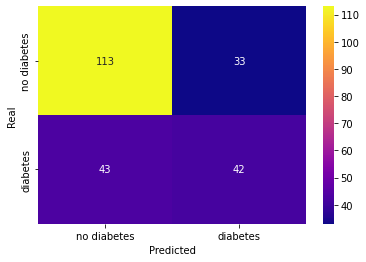

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure()
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

## Visualizar el árbol

### Text representation with sklearn

In [ ]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf,
                                       feature_names=feature_cols)
print(text_representation)

|--- glucose <= 129.50
|   |--- bmi <= 26.30
|   |   |--- bmi <= 9.10
|   |   |   |--- glucose <= 114.50
|   |   |   |   |--- class: 0
|   |   |   |--- glucose >  114.50
|   |   |   |   |--- class: 1
|   |   |--- bmi >  9.10
|   |   |   |--- pedigree <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.67
|   |   |   |   |--- pedigree <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pedigree >  0.71
|   |   |   |   |   |--- class: 0
|   |--- bmi >  26.30
|   |   |--- age <= 27.50
|   |   |   |--- bmi <= 45.40
|   |   |   |   |--- bp <= 12.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bp >  12.00
|   |   |   |   |   |--- pregnant <= 7.00
|   |   |   |   |   |   |--- pedigree <= 1.27
|   |   |   |   |   |   |   |--- bmi <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- bmi >  30.95
|   |   |   |   |   |   |   |   |--- bp <= 53.00
|   |   |   |   |   |   |   |   |   |--- pedigree <= 0.26
|   |   |   |   |   | 

In [ ]:
with open("decistion_tree_textrep.log", "w") as txt_file:
    txt_file.write(text_representation)

### Plot tree with sklearn

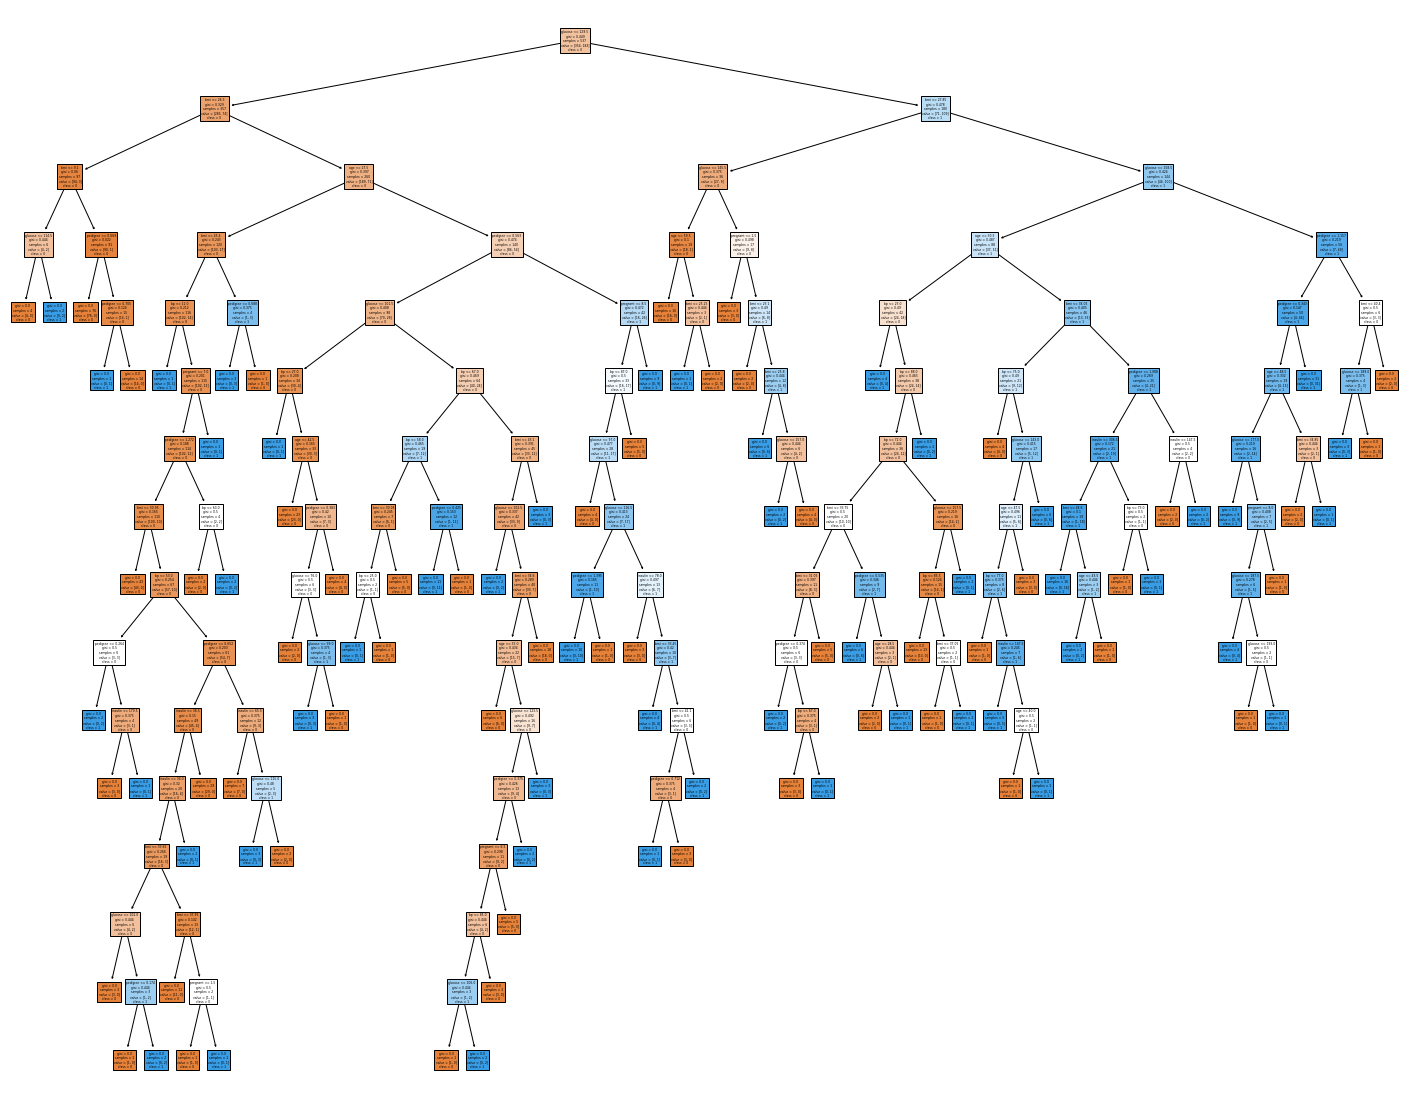

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)


### Using [graphviz](https://graphviz.org/)

In [ ]:
!pip install -q six 

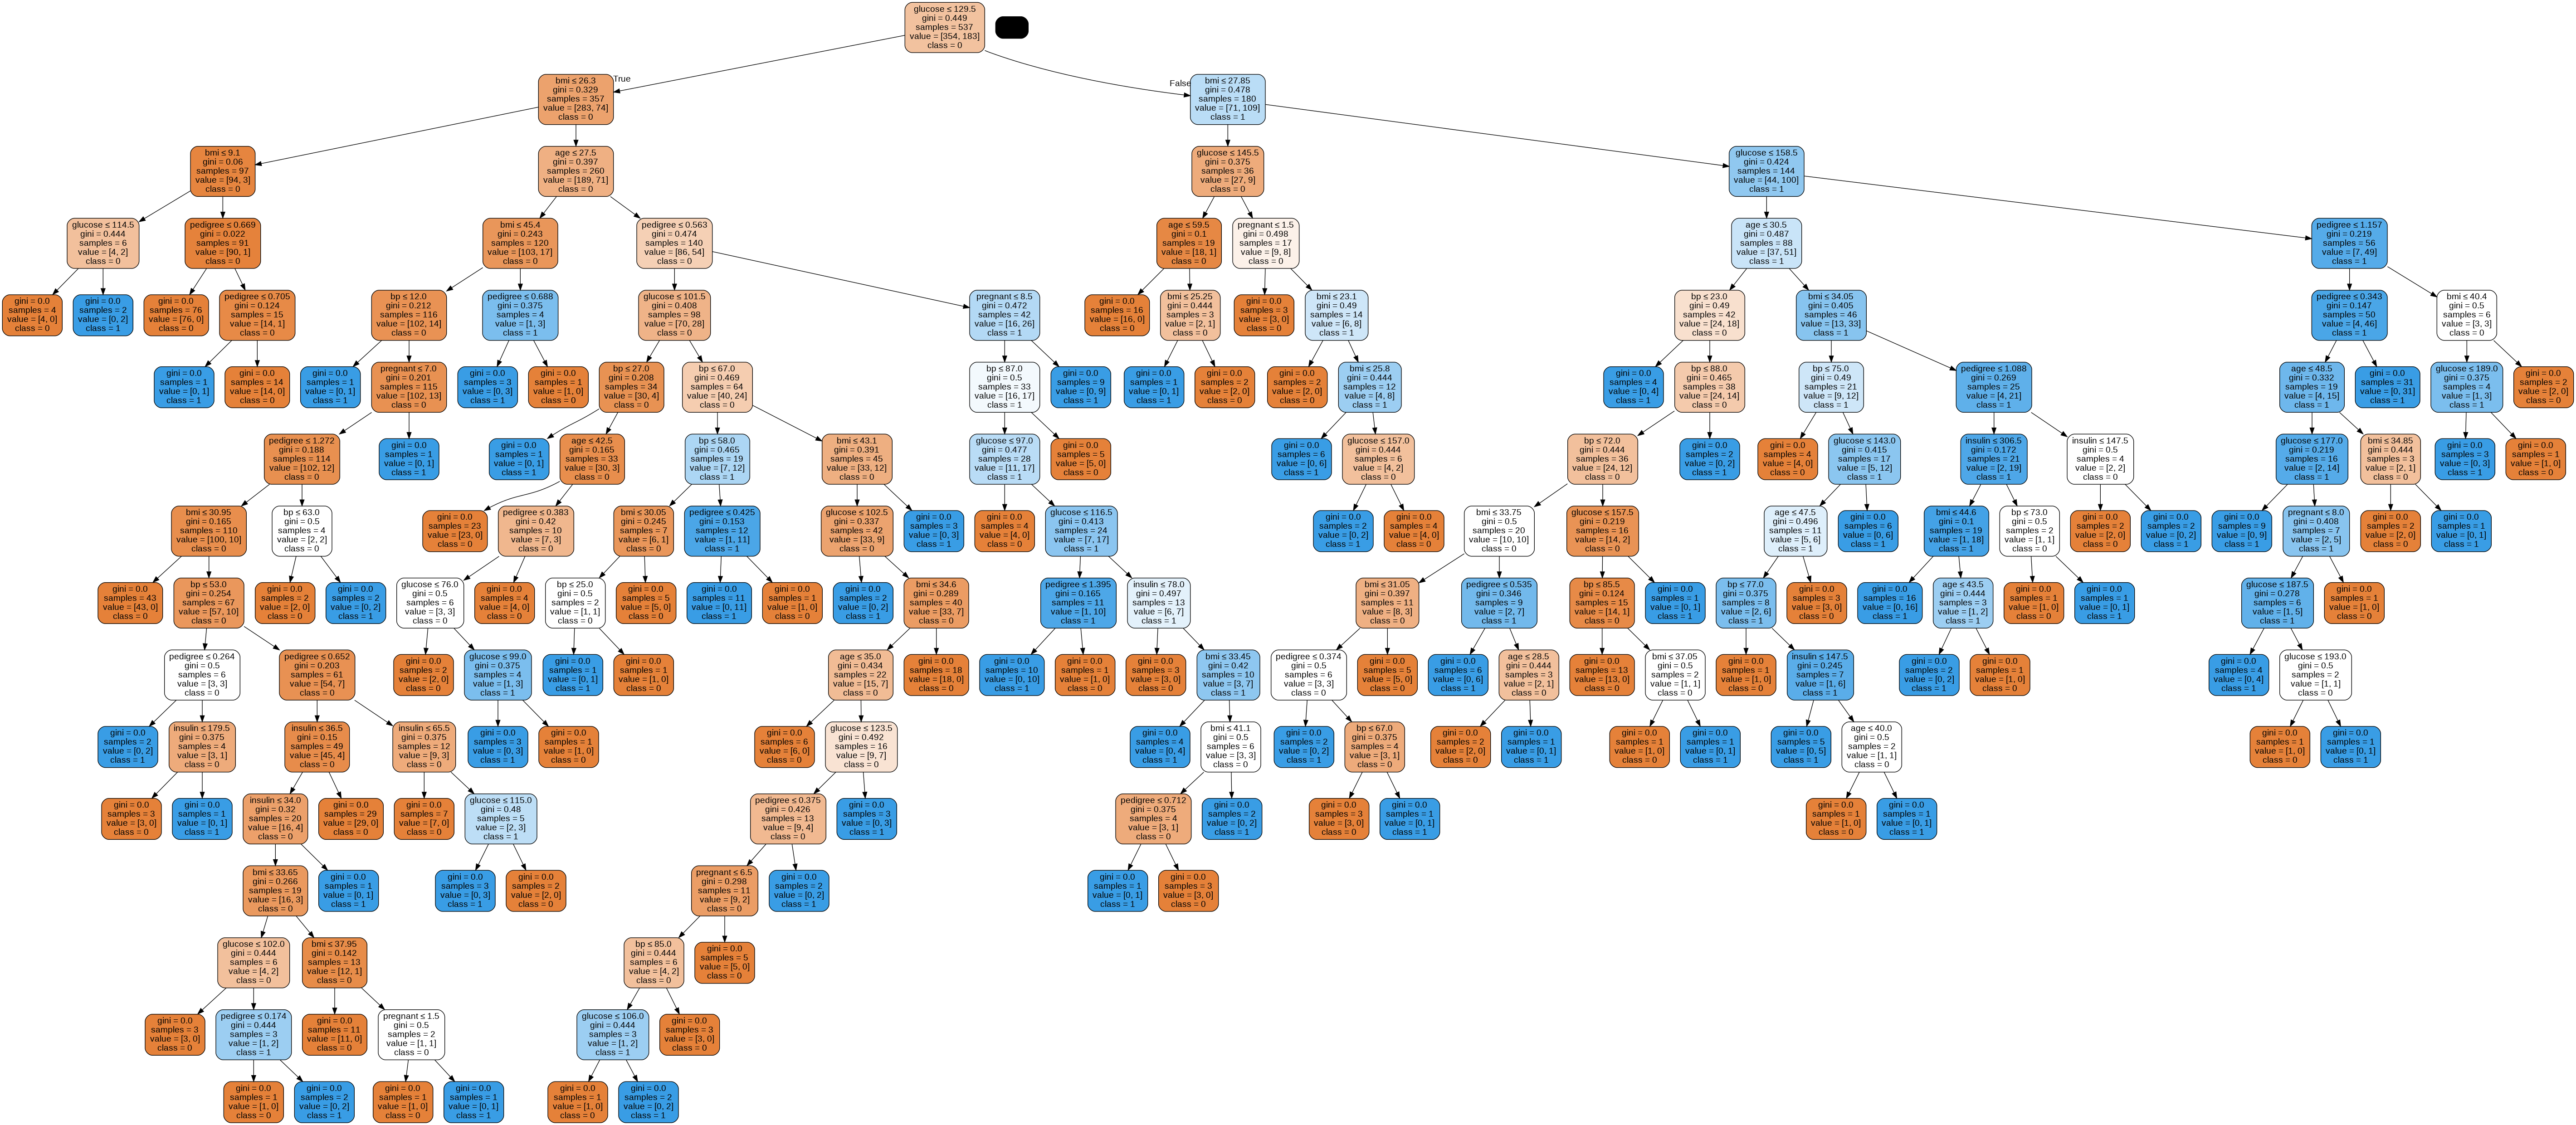

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Plot tree with [dtreeviz](https://github.com/parrt/dtreeviz)

In [ ]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names = feature_cols,
                class_names = ['0','1'])

viz.save("decision_tree_dtreeviz.svg")
viz

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


## ⭐ Ejercicio ⭐

¿Puedes subir las métricas de desempeño de este clasificador en este dataset? Prueba las siguientes modificaciones:

* Cambiar el conjunto de features, ya sea manualmente o con algún método como [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html), [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), etc.
* Normalizar de datos usando el [escalamiento MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), [Normalización](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). ¿Tiene algún efecto considerable?
* Realizar un gridsearch en los principales parámetros del clasificador: 
    * max_depth
    * min_samples_split
    * min_samples_leaf

¿Qué estrategia rindió mejores resultados?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

# ------ Leemos el datraframe ------ 
df = pd.read_csv("/content/data/diabetes.csv") # cargamos el dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
rename_dict = dict(zip(df.columns.to_list(),col_names))
df.rename(columns=rename_dict, inplace=True)
display(df.tail(4))

# ----- Definimos las features -----
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'age']

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

'''

TU CÓDIGO

'''


print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure()
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()